### import modules
1. setup matplot.rcParams to export vectorized plots
2. dxchange is for loading and saving .diff files

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
fontProperties = {'family': 'serif', 'serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import dxchange
import os

from skimage import data
from skimage.transform import rescale

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

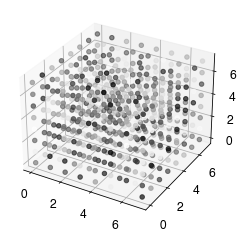

In [7]:
# Make this bigger to generate a dense grid.
N = 8

# Create some random data.
volume = np.random.rand(N, N, N)

# Create the x, y, and z coordinate arrays.  We use 
# numpy's broadcasting to do all the hard work for us.
# We could shorten this even more by using np.meshgrid.
x = np.arange(volume.shape[0])[:, None, None]
y = np.arange(volume.shape[1])[None, :, None]
z = np.arange(volume.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(volume.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           c=c)

In [8]:
padding_width = 1

a = np.ones((3,3,3))
a_pad = np.pad(a, (padding_width,padding_width), mode='constant')
# print(a_pad)

In [9]:
save_path1 = 'data/sample3_pad'
save_path2 = 'data/sample4_pad'

In [10]:
## Create model of K and C map
image_size = 3
K_map = np.zeros((image_size, image_size, image_size))

K_bg = 0.6
K_dist = 0.0

K_map.fill(K_bg)

## upper-left rectangle
K_map[1,1,1] = K_dist

# K_map = rescale(K_map, 0.2)
# plt.imshow(K_map)

K_map = np.pad(K_map, (padding_width,padding_width), mode='constant', constant_values=(0,0))
C_map = K_map

dxchange.write_tiff(K_map, os.path.join(save_path2, "K_map"), dtype='float32', overwrite=True)
dxchange.write_tiff(C_map, os.path.join(save_path1, "C_map"), dtype='float32', overwrite=True)

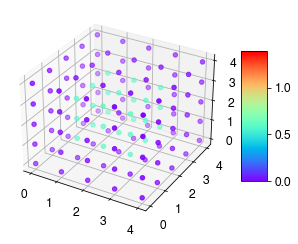

In [11]:
x = np.arange(K_map.shape[0])[:, None, None]
y = np.arange(K_map.shape[1])[None, :, None]
z = np.arange(K_map.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(K_map.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.gca(projection='3d')
grid = ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           vmin=0.0,
           vmax=1.4,
           c = K_map,
           cmap=plt.cm.rainbow)
cbar = fig.colorbar(grid, shrink=0.6, aspect=5) 

Text(0.5, 1.0, 'intensity')

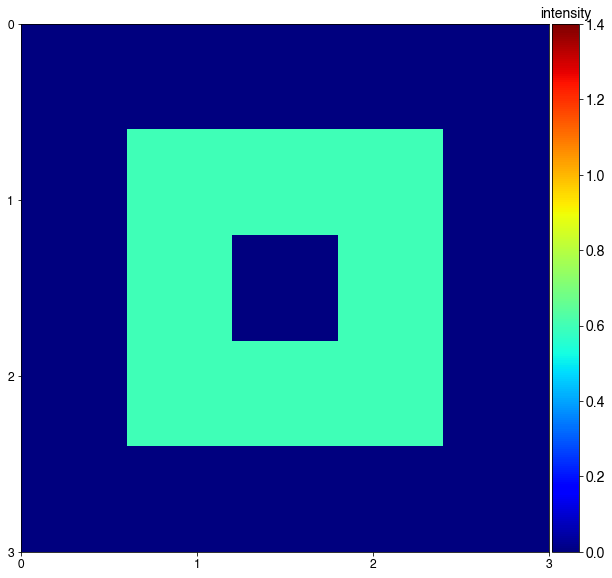

In [12]:
## Plot model
fig1 = plt.figure(figsize=(10,10))
gs1 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig1_ax1 = fig1.add_subplot(gs1[0,0])
fig1_ax1.set_xticks(np.arange(0, image_size + padding_width, 1))
fig1_ax1.set_yticks(np.arange(0, image_size + padding_width, 1))
# fig1_ax1.grid(color='w', linewidth=2)
pos = fig1_ax1.imshow(K_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 3, 3, 0], origin='upper')
divider = make_axes_locatable(fig1_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig1.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [13]:
## Create model of Ga and O map
image_size = 3
Ga_map = np.zeros((image_size, image_size, image_size))

Ga_bg = 1.20
Ga_dist = 1.10

Ga_map.fill(Ga_bg)
Ga_map[1,1] = Ga_dist

Ga_map = np.pad(Ga_map, (padding_width, padding_width), mode='constant', constant_values=(0,0))

O_map = Ga_map

dxchange.write_tiff(Ga_map, os.path.join(save_path2, "Ga_map"), dtype='float32', overwrite=True)
dxchange.write_tiff(O_map, os.path.join(save_path1, "O_map"), dtype='float32', overwrite=True)

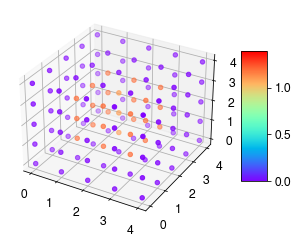

In [14]:
x = np.arange(Ga_map.shape[0])[:, None, None]
y = np.arange(Ga_map.shape[1])[None, :, None]
z = np.arange(Ga_map.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(Ga_map.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.gca(projection='3d')
grid = ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           vmin=0.0,
           vmax=1.4,
           c = Ga_map,
           cmap=plt.cm.rainbow)
cbar = fig.colorbar(grid, shrink=0.6, aspect=5) 

Text(0.5, 1.0, 'intensity')

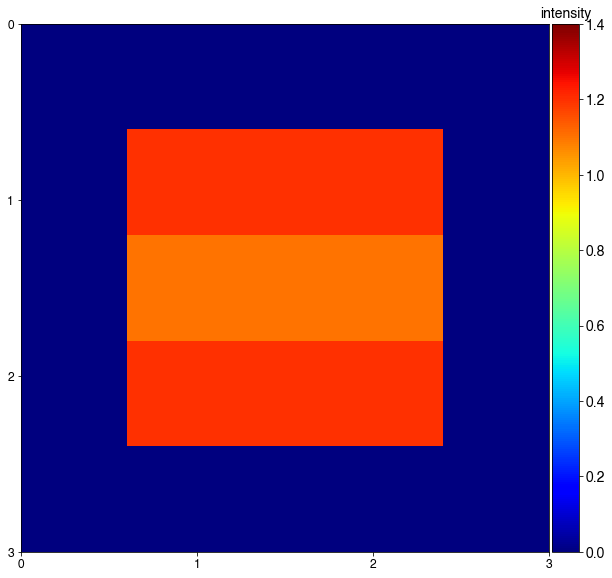

In [15]:
## Plot model
fig2 = plt.figure(figsize=(10,10))
gs2 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig2_ax1 = fig2.add_subplot(gs2[0,0])
fig2_ax1.set_xticks(np.arange(0, image_size + padding_width, 1))
fig2_ax1.set_yticks(np.arange(0, image_size + padding_width, 1))
# fig2_ax1.grid(color='w', linewidth=2)
pos = fig2_ax1.imshow(Ga_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 3, 3, 0], origin='upper')
divider = make_axes_locatable(fig2_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig2.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [16]:
## Create model of Fe and Si map
image_size = 3
Fe_map = np.zeros((image_size, image_size, image_size))

Fe_bg = 0.10
Fe_dist = 0.25

Fe_map.fill(Fe_bg)

## upper-left rectangle
Fe_map[1, 1, 1] = Fe_dist

Fe_map = np.pad(Fe_map,  (padding_width, padding_width), mode='constant', constant_values=(0,0))

Si_map = Fe_map

dxchange.write_tiff(Fe_map, os.path.join(save_path2, "Fe_map"), dtype='float32', overwrite=True)
dxchange.write_tiff(Si_map, os.path.join(save_path1, "Si_map"), dtype='float32', overwrite=True)

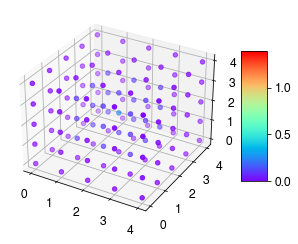

In [17]:
x = np.arange(Fe_map.shape[0])[:, None, None]
y = np.arange(Fe_map.shape[1])[None, :, None]
z = np.arange(Fe_map.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(Fe_map.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.gca(projection='3d')
grid = ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           vmin=0.0,
           vmax=1.4,
           c = Fe_map,
           cmap=plt.cm.rainbow)
cbar = fig.colorbar(grid, shrink=0.6, aspect=5) 

Text(0.5, 1.0, 'intensity')

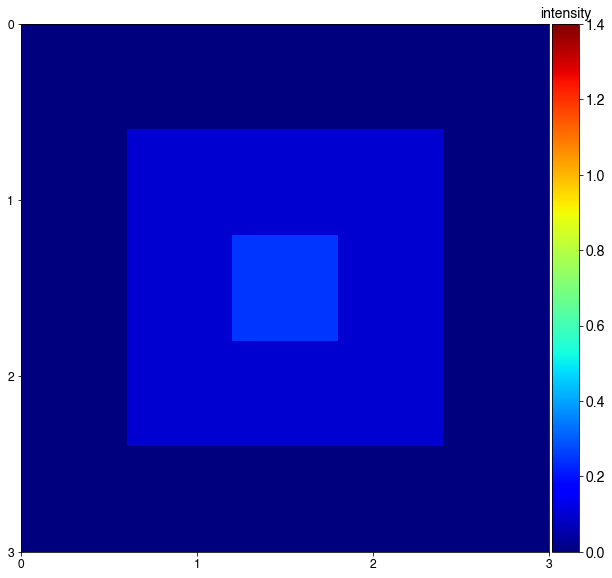

In [18]:
## Plot model
fig3 = plt.figure(figsize=(10,10))
gs3 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig3_ax1 = fig3.add_subplot(gs3[0,0])
fig3_ax1.set_xticks(np.arange(0, image_size + padding_width, 1))
fig3_ax1.set_yticks(np.arange(0, image_size + padding_width, 1))
# fig3_ax1.grid(color='w', linewidth=2)
pos = fig3_ax1.imshow(Fe_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 3, 3, 0], origin='upper')
divider = make_axes_locatable(fig3_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig3.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [19]:
## Create model of Pd and Ca map
image_size = 3
Pd_map = np.zeros((image_size, image_size, image_size))

Pd_bg = 0.00
Pd_dist = 1.38
Pd_dist_2 = 1.10

Pd_map.fill(Pd_bg)

## upper-left rectangle
Pd_map[0:2,0:2,0:2] = Pd_dist


Pd_map = np.pad(Pd_map, (padding_width, padding_width), mode='constant', constant_values=(0,0))

Ca_map = Pd_map

dxchange.write_tiff(Pd_map, os.path.join(save_path2, "Pd_map"), dtype='float32', overwrite=True)
dxchange.write_tiff(Ca_map, os.path.join(save_path1, "Ca_map"), dtype='float32', overwrite=True)

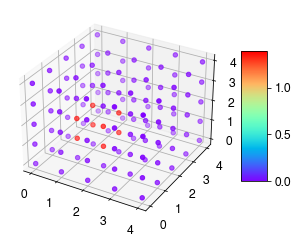

In [20]:
x = np.arange(Pd_map.shape[0])[:, None, None]
y = np.arange(Pd_map.shape[1])[None, :, None]
z = np.arange(Pd_map.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(Pd_map.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.gca(projection='3d')
grid = ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           vmin=0.0,
           vmax=1.4,
           c = Pd_map,
           cmap=plt.cm.rainbow)
cbar = fig.colorbar(grid, shrink=0.6, aspect=5) 

Text(0.5, 1.0, 'intensity')

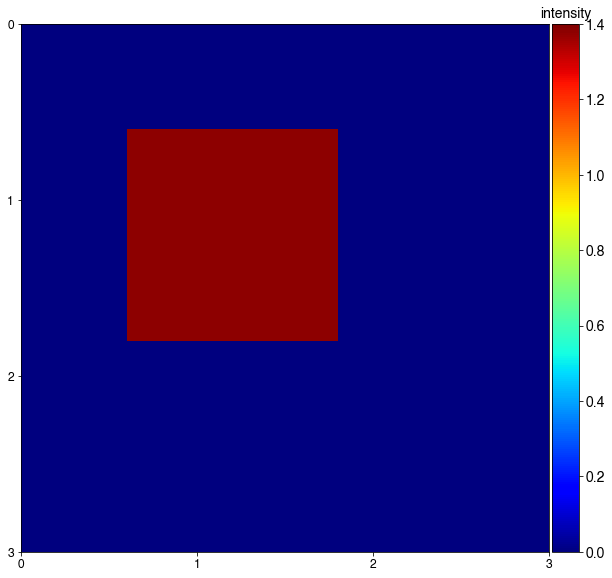

In [21]:
## Plot model
fig4 = plt.figure(figsize=(10,10))
gs4 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig4_ax1 = fig4.add_subplot(gs4[0,0])
fig4_ax1.set_xticks(np.arange(0, image_size + padding_width, 1))
fig4_ax1.set_yticks(np.arange(0, image_size + padding_width, 1))
# fig4_ax1.grid(color='w', linewidth=2)
pos = fig4_ax1.imshow(Pd_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 3, 3, 0], origin='upper')
divider = make_axes_locatable(fig4_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig4.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [22]:
## Create model of Pd and Ca map
image_size = 3
Sn_map = np.zeros((image_size, image_size, image_size))

Sn_bg = 0.00
Sn_dist = 0.60
Sn_dist_2 = 1.10

Sn_map.fill(Sn_bg)

## upper-left rectangle
Sn_map[0,1,1] = Sn_dist
Sn_map[1] = Sn_dist
Sn_map[2,1,1] = Sn_dist


Sn_map = np.pad(Sn_map, (padding_width, padding_width), mode='constant', constant_values=(0,0))

Fe_map_2 = Sn_map

dxchange.write_tiff(Sn_map, os.path.join(save_path2, "Sn_map"), dtype='float32', overwrite=True)
dxchange.write_tiff(Fe_map_2, os.path.join(save_path1, "Fe_map"), dtype='float32', overwrite=True)

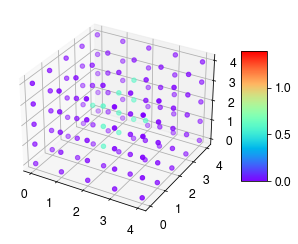

In [23]:
x = np.arange(Sn_map.shape[0])[:, None, None]
y = np.arange(Sn_map.shape[1])[None, :, None]
z = np.arange(Sn_map.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(Pd_map.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.gca(projection='3d')
grid = ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           vmin=0.0,
           vmax=1.4,
           c = Sn_map,
           cmap=plt.cm.rainbow)
cbar = fig.colorbar(grid, shrink=0.6, aspect=5) 

Text(0.5, 1.0, 'intensity')

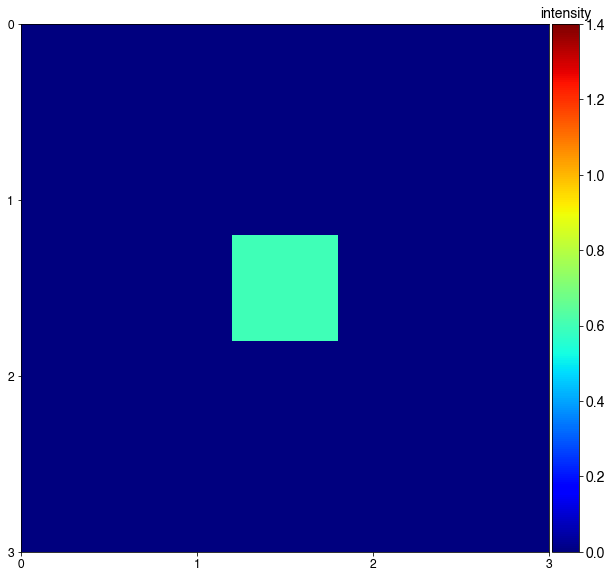

In [24]:
## Plot model
fig5 = plt.figure(figsize=(10,10))
gs5 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig5_ax1 = fig5.add_subplot(gs5[0,0])
fig5_ax1.set_xticks(np.arange(0, image_size + padding_width, 1))
fig5_ax1.set_yticks(np.arange(0, image_size + padding_width, 1))
# fig4_ax1.grid(color='w', linewidth=2)
pos = fig5_ax1.imshow(Sn_map[3], cmap='jet', vmin=0, vmax=1.4, extent=[0, 3, 3, 0], origin='upper')
divider = make_axes_locatable(fig5_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig5.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

Text(0.5, 1.0, 'intensity')

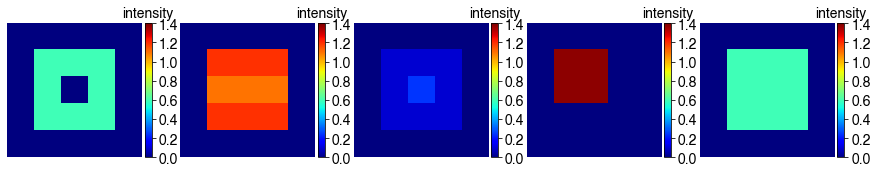

In [27]:
## Plot all 5 models
fig6 = plt.figure(figsize=(15,3))
gs6 = gridspec.GridSpec(nrows=1, ncols=5, width_ratios=[1,1,1,1,1])

fig6_ax1 = fig6.add_subplot(gs6[0,0])
fig6_ax1.set_xticks(np.arange(0, image_size, 1))
fig6_ax1.set_yticks(np.arange(0, image_size, 1))
# fig6_ax1.grid(color='w', linewidth=2)
fig6_ax1.axis('off')
pos = fig6_ax1.imshow(K_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 20, 0], origin='upper')
divider = make_axes_locatable(fig6_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax2 = fig6.add_subplot(gs6[0,1])
fig6_ax2.set_xticks(np.arange(0, image_size, 1))
fig6_ax2.set_yticks(np.arange(0, image_size, 1))
# fig6_ax2.grid(color='w', linewidth=2)
fig6_ax2.axis('off')
pos = fig6_ax2.imshow(Ga_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 20, 0], origin='upper')
divider = make_axes_locatable(fig6_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax3 = fig6.add_subplot(gs6[0,2])
fig6_ax3.set_xticks(np.arange(0, image_size, 1))
fig6_ax3.set_yticks(np.arange(0, image_size, 1))
# fig6_ax3.grid(color='w', linewidth=2)
fig6_ax3.axis('off')
pos = fig6_ax3.imshow(Fe_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 20, 0], origin='upper')
divider = make_axes_locatable(fig6_ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax4 = fig6.add_subplot(gs6[0,3])
fig6_ax4.set_xticks(np.arange(0, image_size, 1))
fig6_ax4.set_yticks(np.arange(0, image_size, 1))
# fig6_ax4.grid(color='w', linewidth=2)
fig6_ax4.axis('off')
pos = fig6_ax4.imshow(Pd_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 20, 0], origin='upper')
divider = make_axes_locatable(fig6_ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax5 = fig6.add_subplot(gs6[0,4])
fig6_ax5.set_xticks(np.arange(0, image_size, 1))
fig6_ax5.set_yticks(np.arange(0, image_size, 1))
# fig6_ax5.grid(color='w', linewidth=2)
fig6_ax5.axis('off')
pos = fig6_ax5.imshow(Sn_map[2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 20, 0], origin='upper')
divider = make_axes_locatable(fig6_ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

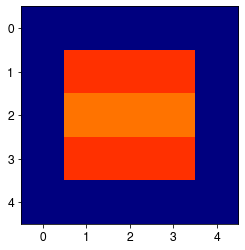

In [30]:
sample1 = np.stack((C_map, O_map, Si_map, Ca_map, Fe_map_2))
sample2 = np.stack((K_map, Ga_map, Fe_map, Pd_map, Sn_map))

np.save(os.path.join(save_path1, 'grid_concentration.npy'), sample1)
np.save(os.path.join(save_path2, 'grid_concentration.npy'), sample2)

read_sample1 = np.load(os.path.join(save_path1 , "grid_concentration.npy"))
plt.imshow(read_sample1[1,2], cmap='jet', vmin=0, vmax=1.4)

In [31]:
from scipy.ndimage import rotate as sp_rotate
import torch as tc
import torch.nn.functional as F

In [34]:
def rotate(arr, theta):
    m0 = tc.tensor([tc.cos(theta), -tc.sin(theta), 0.0])
    m1 = tc.tensor([tc.sin(theta), tc.cos(theta), 0])
    m = tc.stack([m0, m1]).view(1, 2, 3)
    m = m.repeat([arr.shape[0], 1, 1])
    
    g = F.affine_grid(m, arr.shape)
    q = F.grid_sample(arr, g, padding_mode='border')
    
    return q

[-0.         -0.78539816 -1.57079633 -2.35619449 -3.14159265]


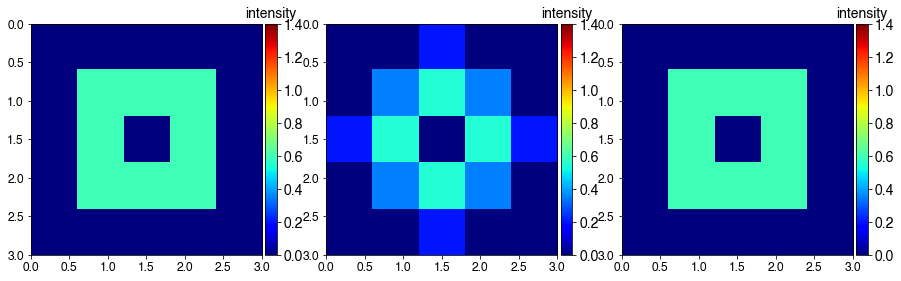

In [66]:
theta_ls = - np.linspace(0, np.pi, 5)
K_map = np.load(os.path.join(save_path1 , "grid_concentration.npy"))

K_map_tc = tc.from_numpy(np.load(os.path.join(save_path1 , "grid_concentration.npy")).astype(np.float32))
K_map_45_1 = rotate(K_map_tc, tc.tensor(theta_ls[1], dtype=tc.float32))
K_map_45_2 = rotate(K_map_tc, tc.tensor(theta_ls[2], dtype=tc.float32))


# K_map = np.load('data/sample1_pad/grid_concentration.npy')[4]
# K_map_45_1 = sp_rotate(K_map, -15, reshape=False, order=1)
# K_map_45_2 = sp_rotate(K_map, -60, reshape=False, order=2)

fig7 = plt.figure(figsize=(15,5))
gs7 = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1,1,1])

fig7_ax1 = fig7.add_subplot(gs7[0,0])
# fig7_ax1.axis('off')
pos = fig7_ax1.imshow(K_map[0,2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 3, 3, 0], origin='upper')
divider = make_axes_locatable(fig7_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig7.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig7_ax2 = fig7.add_subplot(gs7[0,1])
pos = fig7_ax2.imshow(K_map_45_1[0,2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 3, 3, 0], origin='upper')
# fig7_ax2.axis('off')
divider = make_axes_locatable(fig7_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig7.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig7_ax3 = fig7.add_subplot(gs7[0,2])
pos = fig7_ax3.imshow(K_map_45_2[0,2], cmap='jet', vmin=0, vmax=1.4, extent=[0, 3, 3, 0], origin='upper')
# fig7_ax3.axis('off')
divider = make_axes_locatable(fig7_ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig7.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

print(theta_ls)

In [60]:
print(tc.cos(tc.tensor(np.pi)))

tensor(-1.)
